In [64]:
import os
import requests
import zipfile
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [65]:
# reading COT data

urls = {
    'annual_2017': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2017.zip',
    'annual_2018': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2018.zip',
    'annual_2019': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2019.zip',
    'annual_2020': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2020.zip',
    'annual_2021': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2021.zip',
    'annual_2022': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2022.zip',
    'annual_2023': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2023.zip',
    'annual_2024': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2024.zip'
}

In [66]:
extracted_dir = 'data'
os.makedirs(extracted_dir, exist_ok=True)

In [67]:
# unpacking the data

for name, url in urls.items():
    zip_file_path = f'{name}.zip'

    response = requests.get(url)
    response.raise_for_status()
    with open(zip_file_path, 'wb') as file:
        file.write(response.content)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.namelist():
            filename = os.path.basename(member)
            if filename:
                extracted_file_path = os.path.join(extracted_dir, f'{name}_{filename}')
                with zip_ref.open(member) as source, open(extracted_file_path, 'wb') as target:
                    target.write(source.read())

    os.remove(zip_file_path)

In [68]:
# download historical EURUSD data

end_date = datetime.today()
start_date = "2017-01-01"  

data_eurusd = yf.download(
    "EURUSD=X",
    start=start_date,  
    end=end_date.strftime('%Y-%m-%d'),  
    interval="1d"
)

file_path = "data/eurusd_daily_data.csv"
data_eurusd.to_csv(file_path)

[*********************100%***********************]  1 of 1 completed


In [69]:
# processing all .xls files in the extract dir directory, loading their contents into DataFrames, merging these DataFrames into one and saving the result in a CSV file data/annual_merged_data.csv

dfs = []
for file in os.listdir(extracted_dir):
    if file.endswith('.xls'):
        file_path = os.path.join(extracted_dir, file)
        df = pd.read_excel(file_path)
        dfs.append(df)

mdf = pd.concat(dfs, ignore_index=True)
output_csv_path = 'data/annual_merged_data.csv'
mdf.to_csv(output_csv_path, index=False)

In [70]:
cot_data = pd.read_csv(output_csv_path)

print(cot_data.columns.tolist())

['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD', 'Report_Date_as_MM_DD_YYYY', 'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code', 'Open_Interest_All', 'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'NonComm_Postions_Spread_All', 'Comm_Positions_Long_All', 'Comm_Positions_Short_All', 'Tot_Rept_Positions_Long_All', 'Tot_Rept_Positions_Short_All', 'NonRept_Positions_Long_All', 'NonRept_Positions_Short_All', 'Open_Interest_Old', 'NonComm_Positions_Long_Old', 'NonComm_Positions_Short_Old', 'NonComm_Positions_Spread_Old', 'Comm_Positions_Long_Old', 'Comm_Positions_Short_Old', 'Tot_Rept_Positions_Long_Old', 'Tot_Rept_Positions_Short_Old', 'NonRept_Positions_Long_Old', 'NonRept_Positions_Short_Old', 'Open_Interest_Other', 'NonComm_Positions_Long_Other', 'NonComm_Positions_Short_Other', 'NonComm_Positions_Spread_Other', 'Comm_Positions_Long_Other', 'Comm_Positions_Short_Other', 'Tot_Rept_Positions_Long_Other', 'Tot_Rept_Positions_S

In [71]:
unique_values_cot = cot_data['Market_and_Exchange_Names'].unique()
print(unique_values_cot)

['WHEAT-SRW - CHICAGO BOARD OF TRADE' 'WHEAT-HRW - CHICAGO BOARD OF TRADE'
 'WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE'
 'CORN - CHICAGO BOARD OF TRADE' 'OATS - CHICAGO BOARD OF TRADE'
 'SOYBEANS - CHICAGO BOARD OF TRADE'
 'MINI SOYBEANS - CHICAGO BOARD OF TRADE'
 'CALIF CARBON ALL VINTAGE 2016 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2017 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2018 - ICE FUTURES ENERGY DIV'
 'CALIF CARBON ALL VINTAGE 2017 - ICE FUTURES ENERGY DIV'
 'RGGI VINTAGE 2016 - ICE FUTURES ENERGY DIV'
 'CALIF CARBON ALL VINTAGE 2018 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2019 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2020 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2017 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2018 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2019 - ICE FUTURES ENERGY DIV'
 'RGGI VINTAGE 2017 - ICE FUTURES ENERGY DIV'
 'SOYBEAN OIL - CHICAGO BOARD OF TRADE'
 'U.S. TREASURY BONDS - CHICAGO BOARD OF TRADE'
 'ULTR

In [72]:
# This script filters Commitment of Traders (COT) data for the EURO FX market on the Chicago Mercantile Exchange (CME)
# and saves the filtered dataset to a CSV file for further analysis.

filtered_data = cot_data[cot_data['Market_and_Exchange_Names'] == 'EURO FX - CHICAGO MERCANTILE EXCHANGE']

filtered_file_path = "data/cot_eur.csv"
filtered_data.to_csv(filtered_file_path, index=False)

In [73]:
# Loads the filtered COT data for EURO FX from the CSV file and displays the first five rows

cot_eur_data = pd.read_csv(filtered_file_path)
cot_eur_data.head()

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_MM_DD_YYYY,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,...,Conc_Net_LE_8_TDR_Short_Old,Conc_Gross_LE_4_TDR_Long_Other,Conc_Gross_LE_4_TDR_Short_Other,Conc_Gross_LE_8_TDR_Long_Other,Conc_Gross_LE_8_TDR_Short_Other,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units
0,EURO FX - CHICAGO MERCANTILE EXCHANGE,171226,2017-12-26,99741,CME,0,99,497744,208913,116765,...,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"
1,EURO FX - CHICAGO MERCANTILE EXCHANGE,171219,2017-12-19,99741,CME,0,99,485622,198398,112174,...,55.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"
2,EURO FX - CHICAGO MERCANTILE EXCHANGE,171212,2017-12-12,99741,CME,0,99,505744,206027,92138,...,47.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"
3,EURO FX - CHICAGO MERCANTILE EXCHANGE,171205,2017-12-05,99741,CME,0,99,499124,205400,112294,...,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"
4,EURO FX - CHICAGO MERCANTILE EXCHANGE,171128,2017-11-28,99741,CME,0,99,495561,205160,115479,...,47.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"


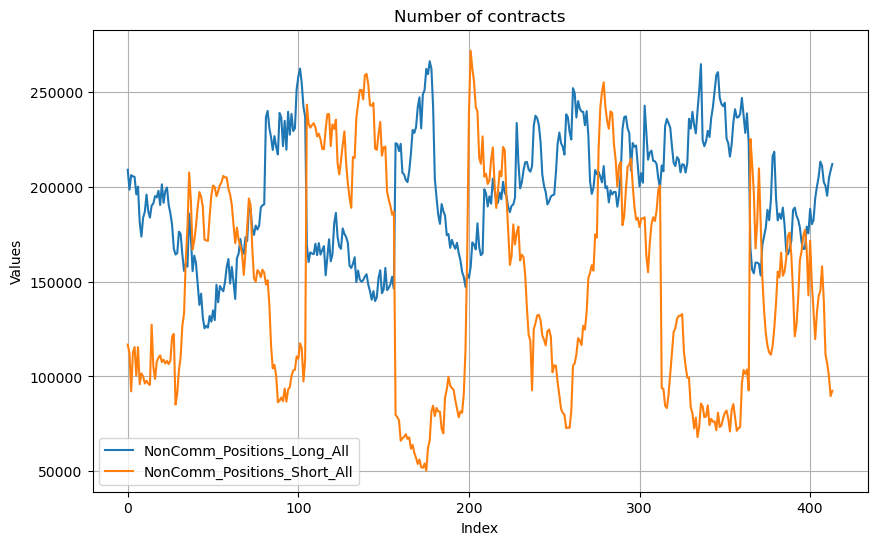

In [74]:
# Plots selected columns from the COT data to visualize long, short positions, and their differences

columns_to_plot = ['NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', "Totall_diff"]

plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    if column in cot_eur_data.columns:
        plt.plot(cot_eur_data[column], label=column)

plt.title("Number of contracts")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

In [75]:
# Merges COT data with EUR/USD daily data based on matching dates, drops redundant columns, sorts by report date, and saves to a new CSV file

df_eur_cot = pd.read_csv(filtered_file_path)
df_eur_cot['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_eur_cot['Report_Date_as_MM_DD_YYYY'])

eurusd_csv_path = 'data/eurusd_daily_data.csv'
df_eurusd = pd.read_csv(eurusd_csv_path)

df_eurusd['Date'] = pd.to_datetime(df_eurusd['Date'])

df_merged = pd.merge(df_eur_cot, df_eurusd, left_on='Report_Date_as_MM_DD_YYYY', right_on='Date', how='left')
df_merged = df_merged.drop(columns=['Date'])

output_csv_path = 'data/merged_eurusd_cot.csv'
df_merged.to_csv(output_csv_path, index=False)

df_merged = df_merged.sort_values(by='Report_Date_as_MM_DD_YYYY').reset_index(drop=True)

In [76]:
# Extracts and prints the last row of specific columns from the merged DataFrame and displays the first five rows of the DataFrame

last_row = df_merged.iloc[-1][['Report_Date_as_MM_DD_YYYY', 'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'Close']]
print(last_row)
df_merged.head()

Report_Date_as_MM_DD_YYYY      2024-12-03 00:00:00
NonComm_Positions_Long_All                  167693
NonComm_Positions_Short_All                 225182
Close                                     1.050122
Name: 413, dtype: object


,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_MM_DD_YYYY,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,...,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units,Open,High,Low,Close,Adj Close,Volume
0,EURO FX - CHICAGO MERCANTILE EXCHANGE,170103,2017-01-03,99741,CME,0,99,416239,129701,199757,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.045916,1.049208,1.034768,1.046003,1.046003,0.0
1,EURO FX - CHICAGO MERCANTILE EXCHANGE,170110,2017-01-10,99741,CME,0,99,415212,134747,200570,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.058761,1.062586,1.056189,1.058862,1.058862,0.0
2,EURO FX - CHICAGO MERCANTILE EXCHANGE,170117,2017-01-17,99741,CME,0,99,415090,128846,195346,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.060389,1.071800,1.060142,1.060299,1.060299,0.0
3,EURO FX - CHICAGO MERCANTILE EXCHANGE,170124,2017-01-24,99741,CME,0,99,414447,131904,184252,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.075755,1.077284,1.072777,1.076079,1.076079,0.0
4,EURO FX - CHICAGO MERCANTILE EXCHANGE,170131,2017-01-31,99741,CME,0,99,405541,125689,171402,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.070710,1.081034,1.068604,1.070859,1.070859,0.0


In [77]:
# Calculates net positions for non-commercial and commercial traders, total difference, and rolling medians for total difference and closing price

df_merged["Netto_Position_NonCom"] = df_merged["NonComm_Positions_Long_All"] - df_merged["NonComm_Positions_Short_All"]
df_merged["Netto_Position_Com"] = df_merged["Comm_Positions_Long_All"] - df_merged["Comm_Positions_Short_All"]
df_merged["Totall_diff"] = df_merged["Netto_Position_Com"].abs() - df_merged["Netto_Position_NonCom"].abs()

df_merged["Median_Total_diff"] = df_merged["Totall_diff"].rolling(window=10).median()
df_merged["Median_Total_diff_Change"] = df_merged["Median_Total_diff"].diff()

df_merged["Median_Close_Price"] = df_merged["Close"].rolling(window=6).median()
df_merged["Median_Close_Trend"] = np.where(df_merged["Median_Close_Price"].diff() > 0, 1, 0)

# Calculate RSI
def calculate_rsi(data, column="Close", window=14):
    delta = data[column].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# First calculate RSI, then calculate its median
df_merged["RSI"] = calculate_rsi(df_merged, column="Median_Close_Price")
df_merged['Median_RSI'] = df_merged['RSI'].rolling(window=6).median()

df_merged = df_merged.iloc[20:].reset_index(drop=True)

df_merged.head(10)

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_MM_DD_YYYY,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,...,Volume,Netto_Position_NonCom,Netto_Position_Com,Totall_diff,Median_Total_diff,Median_Total_diff_Change,Median_Close_Price,Median_Close_Trend,RSI,Median_RSI
0,EURO FX - CHICAGO MERCANTILE EXCHANGE,170523,2017-05-23,99741,CME,0,99,449360,175032,110187,...,0.0,64845,-81570,16725,-1646.0,789.5,1.091835,1,85.228821,75.068424
1,EURO FX - CHICAGO MERCANTILE EXCHANGE,170530,2017-05-30,99741,CME,0,99,453280,176226,103357,...,0.0,72869,-93640,20771,-1063.0,583.0,1.095477,1,86.437586,79.522495
2,EURO FX - CHICAGO MERCANTILE EXCHANGE,170606,2017-06-06,99741,CME,0,99,447178,164889,90880,...,0.0,74009,-91005,16996,4987.5,6050.5,1.105541,1,89.132315,84.547739
3,EURO FX - CHICAGO MERCANTILE EXCHANGE,170613,2017-06-13,99741,CME,0,99,474300,164227,85174,...,0.0,79053,-89928,10875,10837.5,5850.0,1.116262,1,100.000000,85.833204
4,EURO FX - CHICAGO MERCANTILE EXCHANGE,170620,2017-06-20,99741,CME,0,99,379269,167245,122393,...,0.0,44852,-60155,15303,11611.0,773.5,1.117037,1,100.000000,87.784951
5,EURO FX - CHICAGO MERCANTILE EXCHANGE,170627,2017-06-27,99741,CME,0,99,400560,179671,120976,...,0.0,58695,-75505,16810,13825.0,2214.0,1.118988,1,100.000000,94.566158
6,EURO FX - CHICAGO MERCANTILE EXCHANGE,170703,2017-07-03,99741,CME,0,99,422496,185925,108461,...,0.0,77464,-100041,22577,16014.0,2189.0,1.118988,0,100.000000,100.000000
7,EURO FX - CHICAGO MERCANTILE EXCHANGE,170711,2017-07-11,99741,CME,0,99,436899,190267,106479,...,NaN,83788,-108005,24217,16767.5,753.5,NaN,0,100.000000,100.000000
8,EURO FX - CHICAGO MERCANTILE EXCHANGE,170718,2017-07-18,99741,CME,0,99,446259,199540,108219,...,0.0,91321,-118452,27131,16903.0,135.5,NaN,0,100.000000,100.000000
9,EURO FX - CHICAGO MERCANTILE EXCHANGE,170725,2017-07-25,99741,CME,0,99,449086,197656,106814,...,0.0,90842,-115535,24693,18883.5,1980.5,NaN,0,100.000000,100.000000


In [78]:
# This code defines a function that fills missing values (NaN) in a specified DataFrame column by calculating the average of the neighboring values (the previous and next rows). If a neighboring value doesn't exist (e.g., at the beginning or end of the DataFrame), it is treated as NaN. The function iterates through each row, checks for NaN, computes the mean of the neighboring values, and replaces the NaN with this mean. After the function is applied, the updated DataFrame is displayed. This approach is useful for filling gaps in time-series data while preserving local trends.

def fill_nan_with_neighbors_mean(df, column):
    for i in range(len(df)):
        if np.isnan(df.at[i, column]):
            prev_value = df.at[i - 1, column] if i - 1 >= 0 else np.nan
            next_value = df.at[i + 1, column] if i + 1 < len(df) else np.nan
            mean_value = np.nanmean([prev_value, next_value])
            df.at[i, column] = mean_value

fill_nan_with_neighbors_mean(df_merged, 'Close')

print("DataFrame df_merged po uzupełnieniu NaN w 'Close':")
display(df_merged)

DataFrame df_merged po uzupełnieniu NaN w 'Close':


,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_MM_DD_YYYY,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,...,Volume,Netto_Position_NonCom,Netto_Position_Com,Totall_diff,Median_Total_diff,Median_Total_diff_Change,Median_Close_Price,Median_Close_Trend,RSI,Median_RSI
0,EURO FX - CHICAGO MERCANTILE EXCHANGE,170523,2017-05-23,99741,CME,0,99,449360,175032,110187,...,0.0,64845,-81570,16725,-1646.0,789.5,1.091835,1,85.228821,75.068424
1,EURO FX - CHICAGO MERCANTILE EXCHANGE,170530,2017-05-30,99741,CME,0,99,453280,176226,103357,...,0.0,72869,-93640,20771,-1063.0,583.0,1.095477,1,86.437586,79.522495
2,EURO FX - CHICAGO MERCANTILE EXCHANGE,170606,2017-06-06,99741,CME,0,99,447178,164889,90880,...,0.0,74009,-91005,16996,4987.5,6050.5,1.105541,1,89.132315,84.547739
3,EURO FX - CHICAGO MERCANTILE EXCHANGE,170613,2017-06-13,99741,CME,0,99,474300,164227,85174,...,0.0,79053,-89928,10875,10837.5,5850.0,1.116262,1,100.000000,85.833204
4,EURO FX - CHICAGO MERCANTILE EXCHANGE,170620,2017-06-20,99741,CME,0,99,379269,167245,122393,...,0.0,44852,-60155,15303,11611.0,773.5,1.117037,1,100.000000,87.784951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,EURO FX - CHICAGO MERCANTILE EXCHANGE,241105,2024-11-05,99741,CME,0,99,645597,159900,181553,...,0.0,-21653,617,-21036,37086.0,-2666.5,1.089161,0,56.330999,84.346753
390,EURO FX - CHICAGO MERCANTILE EXCHANGE,241112,2024-11-12,99741,CME,0,99,637105,160003,167440,...,0.0,-7437,-18274,10837,33811.0,-3275.0,1.084594,0,48.650733,73.994837
391,EURO FX - CHICAGO MERCANTILE EXCHANGE,241119,2024-11-19,99741,CME,0,99,658774,154305,196862,...,0.0,-42557,21047,-21510,21331.0,-12480.0,1.081730,0,42.581473,60.799254
392,EURO FX - CHICAGO MERCANTILE EXCHANGE,241126,2024-11-26,99741,CME,0,99,665553,156334,212343,...,0.0,-56009,32427,-23582,-4009.5,-25340.5,1.074058,0,34.674271,52.490866


In [79]:
print(df_merged.columns.tolist())

['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD', 'Report_Date_as_MM_DD_YYYY', 'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code', 'Open_Interest_All', 'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'NonComm_Postions_Spread_All', 'Comm_Positions_Long_All', 'Comm_Positions_Short_All', 'Tot_Rept_Positions_Long_All', 'Tot_Rept_Positions_Short_All', 'NonRept_Positions_Long_All', 'NonRept_Positions_Short_All', 'Open_Interest_Old', 'NonComm_Positions_Long_Old', 'NonComm_Positions_Short_Old', 'NonComm_Positions_Spread_Old', 'Comm_Positions_Long_Old', 'Comm_Positions_Short_Old', 'Tot_Rept_Positions_Long_Old', 'Tot_Rept_Positions_Short_Old', 'NonRept_Positions_Long_Old', 'NonRept_Positions_Short_Old', 'Open_Interest_Other', 'NonComm_Positions_Long_Other', 'NonComm_Positions_Short_Other', 'NonComm_Positions_Spread_Other', 'Comm_Positions_Long_Other', 'Comm_Positions_Short_Other', 'Tot_Rept_Positions_Long_Other', 'Tot_Rept_Positions_S

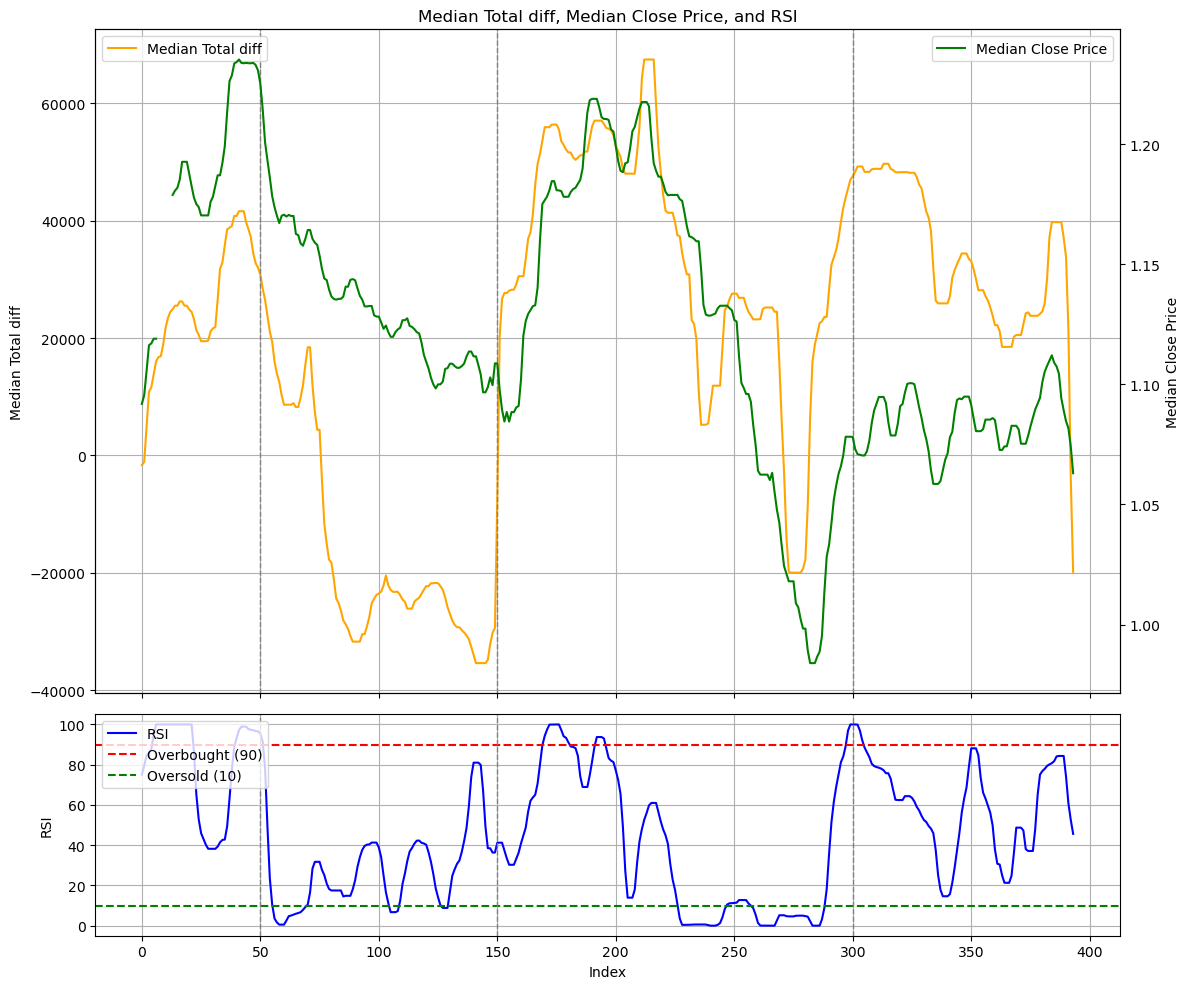

In [80]:
x = df_merged.index
median_total_diff = df_merged["Median_Total_diff"]
median_close_price = df_merged["Median_Close_Price"]
rsi = df_merged['Median_RSI']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ax1.set_title("Median Total diff, Median Close Price, and RSI")
ax1.plot(x, median_total_diff, color='orange', label='Median Total diff')
ax1.set_ylabel("Median Total diff")
ax1.legend(loc='upper left')

ax1b = ax1.twinx()
ax1b.plot(x, median_close_price, color='green', label='Median Close Price')
ax1b.set_ylabel("Median Close Price")
ax1b.legend(loc='upper right')

ax2.plot(x, rsi, color='blue', label='RSI')
ax2.axhline(90, linestyle='--', color='red', label='Overbought (90)')
ax2.axhline(10, linestyle='--', color='green', label='Oversold (10)')
ax2.set_xlabel("Index")
ax2.set_ylabel("RSI")
ax2.legend(loc='upper left')

vertical_lines = [50, 150, 300]  # Indeksy, gdzie chcesz dodać pionowe linie
for vline in vertical_lines:
    ax1.axvline(vline, color='grey', linestyle='--', linewidth=1)  # Pionowa linia na górnym wykresie
    ax2.axvline(vline, color='grey', linestyle='--', linewidth=1)  # Pionowa linia na dolnym wykresie

ax1.grid()
ax2.grid()
plt.tight_layout()

plt.show()

In [81]:
#This code performs predictive modeling using multiple classifiers (Random Forest, Gradient Boosting, and XGBoost) to forecast trends in a financial dataset. Here's a breakdown of each component:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import BaseEstimator, TransformerMixin

class MedianTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, median_window=4):
        self.median_window = median_window

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[f'Median_Close_Price_MA_{self.median_window}'] = (
            X_copy['Median_Close_Price'].rolling(window=self.median_window).mean().bfill()
        )
        return X_copy

data = pd.DataFrame({
    'Median_Total_diff': df_merged["Median_Total_diff"],
    'Median_Total_diff_Change': df_merged["Median_Total_diff_Change"],
    'RSI': df_merged['RSI'],
    'Median_RSI': df_merged['Median_RSI'],
    'Median_Close_Price': df_merged['Median_Close_Price'],
    'Median_Close_Trend': df_merged['Median_Close_Trend']
})


for lag in range(1, 6):
    data[f'Median_Total_diff_lag{lag}'] = data['Median_Total_diff'].shift(lag)
    data[f'RSI_lag{lag}'] = data['RSI'].shift(lag)

data = data.dropna()

X = data.drop(columns=['Median_Close_Trend'])
y = data['Median_Close_Trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(objective='binary:logistic')
}

param_grids = {
    'Random Forest': {
        'model__n_estimators': [50, 100, 200, 300],
        'model__max_depth': [3, 5, 10, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__criterion': ['gini', 'entropy']
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.8, 1.0],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'model__max_depth': [3, 5, 7, 10],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
}

best_models = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    pipeline = Pipeline([
        ('median_transformer', MedianTransformer(median_window=4)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    tscv = TimeSeriesSplit(n_splits=5)
    grid = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=tscv, scoring='accuracy', verbose=2, n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Best params for {model_name}: {grid.best_params_}")
    print(f"Test Accuracy for {model_name}: {acc:.2f}")
    print(classification_report(y_test, y_pred))

    best_models[model_name] = best_model

best_model_name = max(best_models, key=lambda name: accuracy_score(y_test, best_models[name].predict(X_test)))
print(f"\nThe best model is: {best_model_name} with Accuracy = {accuracy_score(y_test, best_models[best_model_name].predict(X_test)):.2f}")


Training Random Forest...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best params for Random Forest: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Test Accuracy for Random Forest: 0.69
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        44
           1       0.63      0.67      0.65        33

    accuracy                           0.69        77
   macro avg       0.68      0.69      0.68        77
weighted avg       0.69      0.69      0.69        77

Training Gradient Boosting...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best params for Gradient Boosting: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300, 'model__subsample': 0.8}
Test Accuracy for Gradient Boosting: 0.73
              precision    recall  f

### Model Comparison

- **Random Forest**:
  - The model achieved moderate accuracy.
  - Results suggest that the model correctly classifies most examples but struggles to recognize both classes evenly.
  - It may be sensitive to data complexity and may require further parameter tuning or more data to improve performance.

- **Gradient Boosting**:
  - This model achieved the best performance among the tested algorithms.
  - It shows a better balance in correctly classifying both classes.
  - Thanks to precise parameter tuning, the model effectively learns from the data and handles more challenging classification cases.

- **XGBoost**:
  - This model delivered results similar to Gradient Boosting but with slightly lower accuracy.
  - It remains a solid choice, particularly if training speed and flexibility in parameter adjustments are priorities.

---

### General Conclusions

- **Gradient Boosting** appears to be the most effective among the tested models for this dataset.
- **Classification accuracy** indicates moderate predictive capability, suggesting that:
  - The data may contain certain limitations or ambiguities.
  - Further improvements can be achieved by adding new features or preprocessing the data.
- **Class balance**: The results show some differences in classification effectiveness between classes. Balancing the data or adjusting the approach for the minority class may be necessary.

---

### Recommendations

1. **Data Optimization**: Analyze the features used for training the models to identify the most significant ones.
2. **Class Balancing**: Consider techniques such as oversampling or undersampling to improve results for the minority class.
3. **Further Parameter Tuning**: Experiment with different model configurations to find the optimal settings.
4. **Dataset Expansion**: Increasing the amount of training data can help improve model accuracy.

In [82]:
# This code creates a Voting Classifier that combines three models – Random Forest, Gradient Boosting, and XGBoost – using hard voting to make final predictions based on majority voting. The classifier is trained on the training data, and its performance is evaluated on the test data, displaying the accuracy score and a detailed classification report.

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

random_forest = RandomForestClassifier(
    criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200
)

gradient_boosting = GradientBoostingClassifier(
    learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=0.8
)

xgboost = XGBClassifier(
    colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0, objective='binary:logistic'
)

voting_clf = VotingClassifier(estimators=[
    ('Random Forest', random_forest),
    ('Gradient Boosting', gradient_boosting),
    ('XGBoost', xgboost)
], voting='hard')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Voting Classifier Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        44
           1       0.62      0.70      0.66        33

    accuracy                           0.69        77
   macro avg       0.69      0.69      0.69        77
weighted avg       0.69      0.69      0.69        77



### Interpretation of Results for Voting Classifier

#### **Overall Performance**
- The **Voting Classifier** achieved an accuracy of **70%**, indicating moderate performance.
- The model effectively predicts outcomes, but there are noticeable limitations, particularly in achieving balanced performance across both classes.

#### **Class Balance**
- The model performs slightly better for class **0** compared to class **1**.
  - **Class 0**: Higher precision, meaning fewer false positives.
  - **Class 1**: Higher recall, meaning more true positives, but precision is lower.
- This imbalance suggests that the model may favor predicting class **0** more confidently.

#### **Precision and Recall**
- **Precision**:
  - **Class 0**: The model correctly identifies 77% of instances classified as class 0.
  - **Class 1**: The model correctly identifies 63% of instances classified as class 1.
- **Recall**:
  - **Class 0**: 68% of actual class 0 instances are correctly classified.
  - **Class 1**: 73% of actual class 1 instances are correctly classified.

#### **F1-Score**
- The **F1-Score** balances precision and recall:
  - **Class 0**: 0.72
  - **Class 1**: 0.68
- This indicates that the model performs reasonably well but is not optimal and leaves room for improvement.

---

### **Conclusions**

1. **Balanced Performance**:
   - The overall accuracy of 70% is decent, but the imbalance between precision and recall for the two classes shows that the model struggles to handle both classes equally well.

2. **Class Imbalance**:
   - The model favors class **0**, potentially due to class imbalance in the dataset or model bias.

3. **Potential for Improvement**:
   - **Class Weight Adjustment**: Adjust class weights to improve the classification of class **1**.
   - **Hyperparameter Tuning**: Further optimize the parameters of individual models within the Voting Classifier.
   - **Data Balancing**: Use techniques like oversampling or undersampling to balance the dataset.
   - **Ensemble Optimization**: Consider adding more diverse models or using soft voting instead of hard voting to improve overall performance.

This analysis provides insights into how the model performs and offers actionable steps to enhance accuracy and balance between classes.


In [84]:
# price median prediction for the next period
last_record = X_test.iloc[-1:]  # lub X_train.iloc[-1:]

prediction = voting_clf.predict(last_record)

if prediction[0] == 0:
    print("Prediction for the next period: Median EURUSD price is expected to decrease.")
else:
    print("Prediction for the next period: Median EURUSD price is expected to increase.")

Prediction for the next period: Median EURUSD price is expected to decrease.
